<a href="https://colab.research.google.com/github/utkutopuz/ArduinoandCplusplus/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data is prepared and it needs to be preprocessed.

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c dog-breed-identification

dog-breed-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
zip_file_path = '/content/dog-breed-identification.zip'

# Specify the target directory for unzipping
target_dir = '/content/dog-breed-identification'

# Unzip the file
!unzip -q $zip_file_path -d $target_dir

replace /content/dog-breed-identification/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset_path = '/content/dog-breed-identification/labels.csv'
df = pd.read_csv(dataset_path)


In [ ]:
# Display the first few rows of the dataframe
df.head()



,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
df.shape

(10222, 2)

<Axes: xlabel='breed', ylabel='count'>

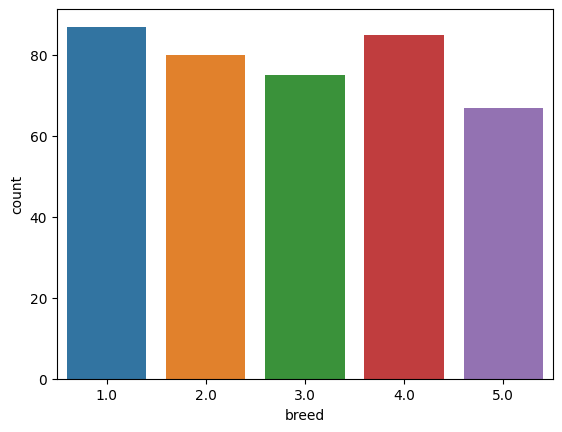

In [ ]:
dog_breed_categories = {
    "boston_bull": 1,
    "dingo": 2,
    "pekinese": 3,
    "bluetick": 4,
    "golden_retriever": 5
}
sns.countplot(x=df["breed"].map(dog_breed_categories))

In [ ]:
# Extract features (pixel values) and breeds
X = df.drop('breed', axis=1)  # breed is the column name for the dog breeds
y = df['breed']


In [ ]:
#Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
path = '/content/dog-breed-identification/train'
target_shape = (128, 128, 3)

def load_and_preprocess_image(id_path, target_shape):
    img = plt.imread(id_path)
    img = cv2.resize(img, (target_shape[1], target_shape[0]))  # Resize the image
    return img

Load and preprocess images to an array of RGB colors

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_and_preprocess_images(directory_path, target_shape, selected_breeds):
    image_list = []
    labels = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory_path, filename)
            breed = df[df['id'] == filename.split('.')[0]]['breed'].values[0]

            if breed in selected_breeds:
                img = load_and_preprocess_image(file_path, target_shape)
                image_list.append(img)
                labels.append(breed)

    return np.array(image_list), np.array(labels)

# Example usage
path = '/content/dog-breed-identification/train'
target_shape = (128, 128, 3)
selected_breeds = ['beagle', 'chihuahua', 'doberman', 'french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound', 'shih_tzu', 'siberian_husky', 'staffordshire_bullterrier', 'wheaten_terrier', 'yorkshire_terrier']

images_array_selected, labels_selected = load_and_preprocess_images(path, target_shape, selected_breeds)

# Check the shape of the resulting array
print(images_array_selected.shape)
print(labels_selected.shape)



(1028, 128, 128, 3)
(1028,)



'images_array' is already loaded and preprocessed

> Indented block



> Indented block



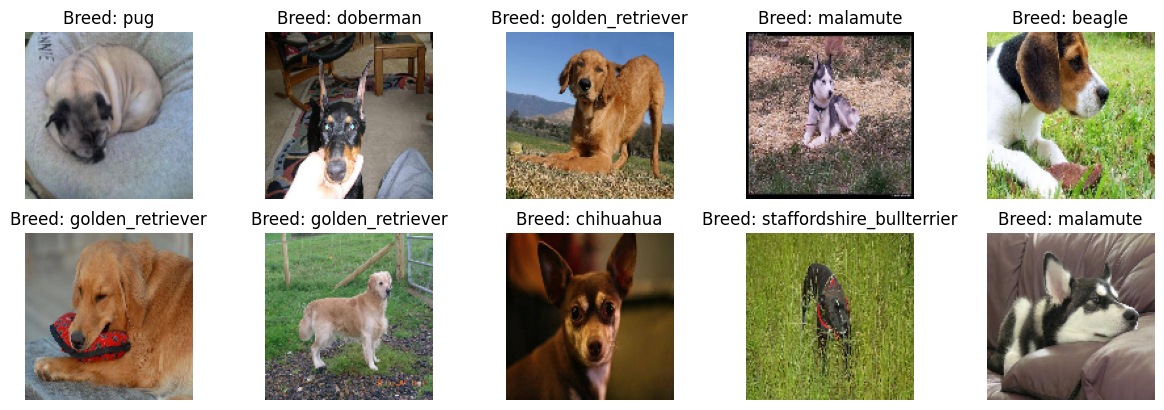

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first 10 images of the selected breeds
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images_array_selected[i])
    plt.title('Breed: {x}'.format(x=labels_selected[i]))
    plt.axis('off')

plt.show()

In [ ]:

# Assuming df is your dataframe with 'breed' column
# Assuming Label Encoding for simplicity
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming df is your dataframe with 'breed' column
# Assuming Label Encoding for simplicity
le = LabelEncoder()

# Fit and transform the labels_selected['breed'] using LabelEncoder
y_encoded = le.fit_transform(labels_selected)

# One-hot encode the encoded labels
y_one_hot = to_categorical(y_encoded, num_classes=15)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe with 'breed' column and images_array contains preprocessed images

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(images_array_selected, labels_selected, test_size=0.2, random_state=42)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (822, 128, 128, 3)
Validation set shape: (103, 128, 128, 3)
Test set shape: (103, 128, 128, 3)


In [ ]:
# Normalize pixel values to the range [0, 1]
X_train_normalized = X_train / 255.0
X_val_normalized = X_val / 255.0
X_test_normalized = X_test / 255.0

# Print the shapes of the normalized sets
print("Normalized Training set shape:", X_train_normalized.shape)
print("Normalized Validation set shape:", X_val_normalized.shape)
print("Normalized Test set shape:", X_test_normalized.shape)

Normalized Training set shape: (822, 128, 128, 3)
Normalized Validation set shape: (103, 128, 128, 3)
Normalized Test set shape: (103, 128, 128, 3)


Building Model

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Assuming X_train_normalized, y_train, X_val_normalized, y_val are your training and validation sets

# Build the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))  # Assuming 15 breeds

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()




Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 28800)             0         
                                                                 
 dense_34 (Dense)            (None, 64)              

In [98]:
# Train the model with data augmentation
history = model.fit(X_train_normalized, y_train_encoded, batch_size=128,
                    epochs=50,
                    validation_data=(X_val_normalized, y_val_encoded))




Epoch 1/50
7/7 [==============================] - 2s 125ms/step - loss: 2.7263 - accuracy: 0.1022 - val_loss: 2.6717 - val_accuracy: 0.0874
Epoch 2/50
7/7 [==============================] - 0s 36ms/step - loss: 2.6701 - accuracy: 0.0912 - val_loss: 2.6450 - val_accuracy: 0.1068
Epoch 3/50
7/7 [==============================] - 0s 36ms/step - loss: 2.6471 - accuracy: 0.0876 - val_loss: 2.6316 - val_accuracy: 0.1068
Epoch 4/50
7/7 [==============================] - 0s 36ms/step - loss: 2.6236 - accuracy: 0.1095 - val_loss: 2.6208 - val_accuracy: 0.1165
Epoch 5/50
7/7 [==============================] - 0s 38ms/step - loss: 2.6149 - accuracy: 0.1083 - val_loss: 2.6065 - val_accuracy: 0.1262
Epoch 6/50
7/7 [==============================] - 0s 38ms/step - loss: 2.5977 - accuracy: 0.0985 - val_loss: 2.5984 - val_accuracy: 0.1262
Epoch 7/50
7/7 [==============================] - 0s 36ms/step - loss: 2.6054 - accuracy: 0.1022 - val_loss: 2.5920 - val_accuracy: 0.1262
Epoch 8/50
7/7 [==========

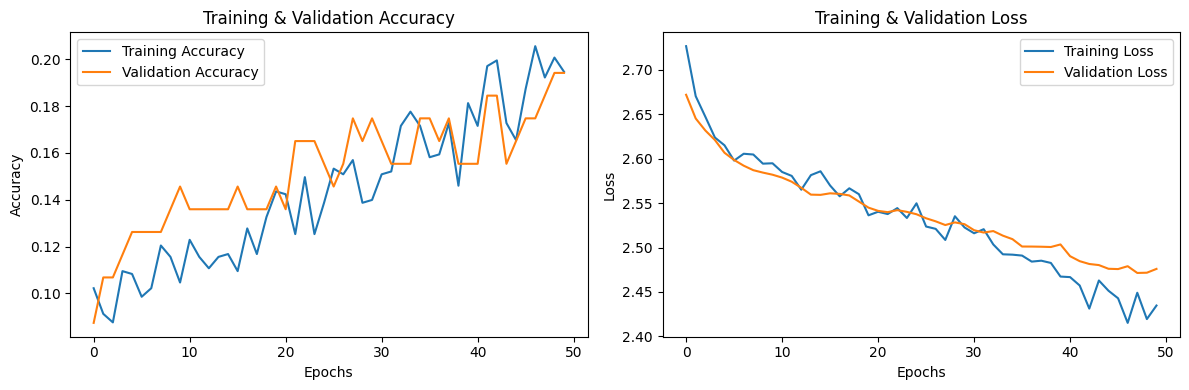

In [99]:
# Plot model's accuracy and loss
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
